#Hotel Booking Analysis

Importing necessary liberaries

In [ ]:
# Import necessary liberaries
import numpy as np      #import numpy for the numerical computation
import pandas as pd     #import pandas for the data manipulation and analysis
import matplotlib.pyplot as plt     #import matplotlib.pyplot and seaborn for data visualization
import seaborn as sns

Reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')
df.head(10)  # Display the first 10 rows of the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
# Show all the coulmns
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


Handling the missing values

In [ ]:
# Check for missing values
print(df.isnull().sum())  # Display the count of missing values in each column

# Fill or drop missing values if necessary
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Converting the necessary columns to datetime format and checking the data types

In [ ]:
# Convert necessary columns to datetime format (if applicable)
# Assuming 'reservation_status_date' is the column indicating reservation date
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Display data types to confirm conversions
print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

###Bookings are more on weekdays or weekends?

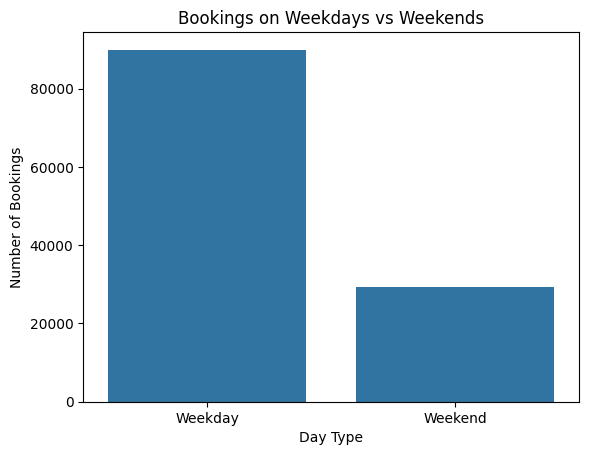

In [ ]:
# Extract day of the week from the reservation date
df['day_of_week'] = df['reservation_status_date'].dt.day_name()

# Classify into weekdays and weekends
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Plot the distribution of bookings
sns.countplot(x='day_type', data=df)
plt.title('Bookings on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Bookings')
plt.show()

### Between the Resort and city hotels, which are more prone to cancellations?

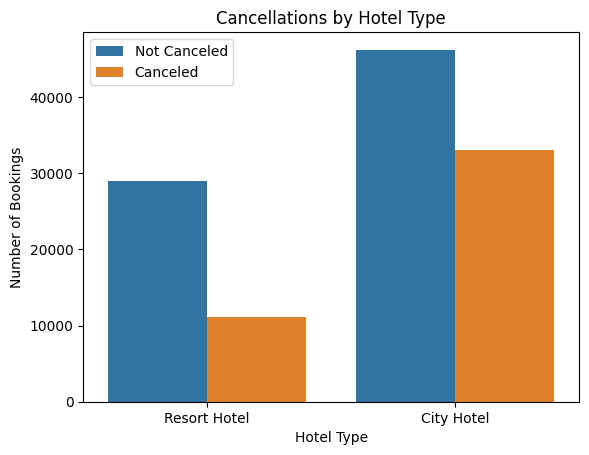

In [ ]:
# Plotting cancellations by hotel type
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

### Distribution of Bookings Over Hotel Types

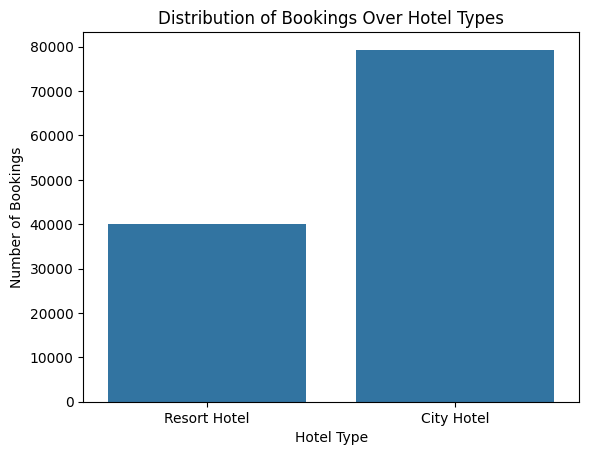

In [ ]:
# Plot the distribution of bookings over hotel types
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Bookings Over Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

### Distribution of Cancellations Over Week Numbers

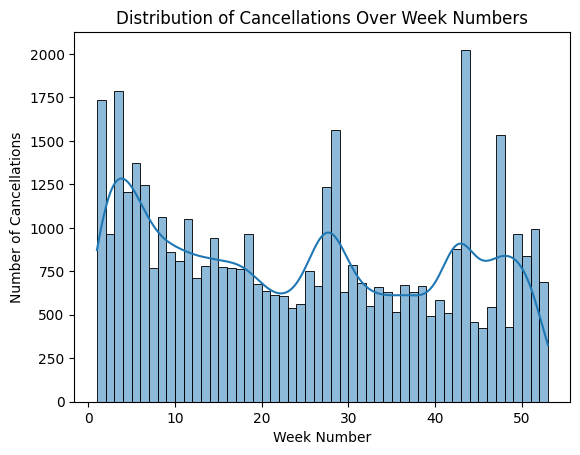

In [ ]:
# Extract the week number from the reservation date
df['week_number'] = df['reservation_status_date'].dt.isocalendar().week

# Plot the distribution of cancellations over week numbers
sns.histplot(df[df['is_canceled'] == 1]['week_number'], bins=52, kde=True)
plt.title('Distribution of Cancellations Over Week Numbers')
plt.xlabel('Week Number')
plt.ylabel('Number of Cancellations')
plt.show()

### Average Lead Time by Hotel Type

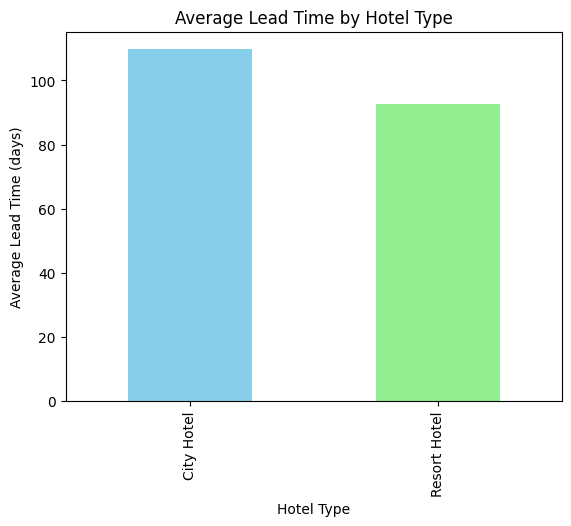

In [ ]:
# Calculate average lead time by hotel type
avg_lead_time = df.groupby('hotel')['lead_time'].mean()

# Plot the average lead time by hotel type
avg_lead_time.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Lead Time by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Lead Time (days)')
plt.show()

#Conclusions


1. Bookings on Weekdays vs Weekends: The first plot shows that there are more bookings on weekdays than weekends.
2. City Hotels and Cancellations: The second plot reveala that the city hotels have a higher cancellation rate.
3. Distribution of Bookings Over Hotel Types: The third plot shows that the city hotels is more popular than the resort hotels.
4. Cancellations Over Week Numbers: The fourth plot shows the trends or patterns in cancellations over the year. From this plot, it can be infered that the most number of booking cancelations are recorded between the 43rd week and 44th week.
5. Average Lead Time: Understanding the average lead time by hotel type can help in planning and marketing strategies. As the average lead time of the city hotels is greater than the resort hotels, it is advisable to invest more in the expansion of the city hoteals and to assess the poor likeliness of the resort hotels.

In [3]:
# Clone your GitHub repository
!git clone https://github.com/Utkrisht9519/Hotel-Booking-Analysis.git

Cloning into 'Hotel-Booking-Analysis'...


In [5]:
# Navigate into the cloned repository's directory
%cd Hotel-Booking-Analysis

/content/Hotel-Booking-Analysis


In [6]:
# Configure Git with GitHub credentials:
!git config --global user.email "rkayush412@gmail.com"
!git config --global user.name "Utkrisht Agrawal"

In [13]:
# prompt: Add github cummits

!git add .
!git commit -m "Added initial analysis and visualizations"
!git push origin main

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Utkrisht9519/Hotel-Booking-Analysis.git'


In [9]:
# Commit the changes
!git commit -m "Commit message from Colab"

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


Thank You!!!